In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import time
from sklearn.ensemble import RandomForestClassifier

In [17]:
ccd=pd.read_csv('D:/UIUC/IE517 machine learning/week7/homework/ccdefault.csv',index_col='ID')
ccd.head()
#split the dataset
X=ccd.iloc[:,0:23].values
y=ccd.iloc[:,23].values
feat_labels=ccd.columns[1:]

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)
dt=DecisionTreeClassifier(max_depth=5, random_state=1)

In [19]:
#10 fold cross validation
scores=cross_val_score(estimator=dt,X=X_train,y=y_train,cv=10,n_jobs=1)

In [24]:
#Part1:random forest
begin=5
end=105
irange=np.arange(begin,end,5)

for i in irange:
    start = time.perf_counter()
    rf=RandomForestClassifier(n_estimators=i,random_state=1,n_jobs=1)
    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_train)
    scores=cross_val_score(estimator=rf,X=X_train,y=y_train,cv=10,n_jobs=1)
    end = time.perf_counter()
    
    print ("when n=%d Training time usage is %f s"%(i,end - start))  
    print("when n= %d accuracy is %f"% (i,np.mean(scores)))


when n=5 Training time usage is 2.809612 s
when n= 5 accuracy is 0.790222
when n=10 Training time usage is 5.492367 s
when n= 10 accuracy is 0.806704
when n=15 Training time usage is 8.208185 s
when n= 15 accuracy is 0.809000
when n=20 Training time usage is 11.054542 s
when n= 20 accuracy is 0.812037
when n=25 Training time usage is 13.626499 s
when n= 25 accuracy is 0.812815
when n=30 Training time usage is 16.272438 s
when n= 30 accuracy is 0.813481
when n=35 Training time usage is 19.014006 s
when n= 35 accuracy is 0.814222
when n=40 Training time usage is 21.760280 s
when n= 40 accuracy is 0.815222
when n=45 Training time usage is 25.344977 s
when n= 45 accuracy is 0.815370
when n=50 Training time usage is 27.349546 s
when n= 50 accuracy is 0.816037
when n=55 Training time usage is 30.044633 s
when n= 55 accuracy is 0.815148
when n=60 Training time usage is 34.099004 s
when n= 60 accuracy is 0.815185
when n=65 Training time usage is 36.355543 s
when n= 65 accuracy is 0.816074
when

 1)PAY_2                          0.094731
 2)PAY_0                          0.067229
 3)SEX                            0.060723
 4)BILL_AMT2                      0.059854
 5)BILL_AMT3                      0.055363
 6)PAY_AMT2                       0.051488
 7)BILL_AMT4                      0.051279
 8)PAY_AMT1                       0.050725
 9)BILL_AMT6                      0.050485
10)BILL_AMT5                      0.049840
11)PAY_3                          0.047779
12)PAY_AMT3                       0.047746
13)PAY_AMT4                       0.046279
14)DEFAULT                        0.045831
15)PAY_AMT6                       0.042973
16)PAY_AMT5                       0.042738
17)PAY_4                          0.028077
18)PAY_5                          0.024465
19)MARRIAGE                       0.019976
20)PAY_6                          0.018436
21)BILL_AMT1                      0.017467
22)AGE                            0.014277
23)EDUCATION                      0.012238


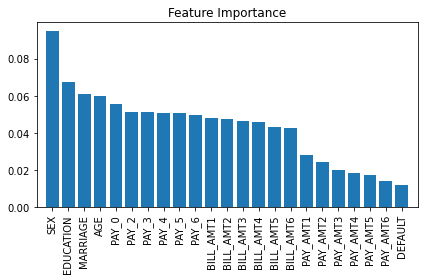

In [25]:
#Part2:random forest feature importance
rf=RandomForestClassifier(n_estimators=65,random_state=1,n_jobs=1)
rf.fit(X_train,y_train)
importances=rf.feature_importances_
indices=np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d)%-*s %f"%(f+1,30,feat_labels[indices[f]],importances[indices[f]]))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),importances[indices],align='center')
plt.xticks(range(X_train.shape[1]),feat_labels,rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.show()

In [26]:
print("My name is Chenxiang zhang")
print("My NetID is: cz52")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Chenxiang zhang
My NetID is: cz52
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
